<a href="https://colab.research.google.com/github/sakshammverma/TurboAi/blob/main/Titanic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [46]:
import numpy as np
import pandas as pd


In [47]:
test=pd.read_csv('/content/test_clean.csv')
train=pd.read_csv('/content/train_clean.csv')

In [48]:
test.head()


,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket,Title,Family_Size
0,34.5,NaN,Q,7.8292,"Kelly, Mr. James",0,892,3,male,0,NaN,330911,Mr,0
1,47.0,NaN,S,7.0000,"Wilkes, Mrs. James (Ellen Needs)",0,893,3,female,1,NaN,363272,Mrs,1
2,62.0,NaN,Q,9.6875,"Myles, Mr. Thomas Francis",0,894,2,male,0,NaN,240276,Mr,0
3,27.0,NaN,S,8.6625,"Wirz, Mr. Albert",0,895,3,male,0,NaN,315154,Mr,0
4,22.0,NaN,S,12.2875,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",1,896,3,female,1,NaN,3101298,Mrs,2


In [49]:
test_passenger_ids = test['PassengerId']

In [86]:
bins = [0, 12, 19, 60, 100]
labels = ['Children', 'Teenagers', 'Adults', 'Seniors']
train['Age_Group'] = pd.cut(train['Age'], bins=bins, labels=labels, right=False)


In [50]:
train.head()

,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket,Title,Family_Size
0,22.0,NaN,S,7.2500,"Braund, Mr. Owen Harris",0,1,3,male,1,0.0,A/5 21171,Mr,1
1,38.0,C85,C,71.2833,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,2,1,female,1,1.0,PC 17599,Mrs,1
2,26.0,NaN,S,7.9250,"Heikkinen, Miss. Laina",0,3,3,female,0,1.0,STON/O2. 3101282,Miss,0
3,35.0,C123,S,53.1000,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,4,1,female,1,1.0,113803,Mrs,1
4,35.0,NaN,S,8.0500,"Allen, Mr. William Henry",0,5,3,male,0,0.0,373450,Mr,0


In [51]:
train.isnull().sum()

,0
Age,0
Cabin,687
Embarked,0
Fare,0
Name,0
Parch,0
PassengerId,0
Pclass,0
Sex,0
SibSp,0


In [52]:
train.head()

,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket,Title,Family_Size
0,22.0,NaN,S,7.2500,"Braund, Mr. Owen Harris",0,1,3,male,1,0.0,A/5 21171,Mr,1
1,38.0,C85,C,71.2833,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,2,1,female,1,1.0,PC 17599,Mrs,1
2,26.0,NaN,S,7.9250,"Heikkinen, Miss. Laina",0,3,3,female,0,1.0,STON/O2. 3101282,Miss,0
3,35.0,C123,S,53.1000,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,4,1,female,1,1.0,113803,Mrs,1
4,35.0,NaN,S,8.0500,"Allen, Mr. William Henry",0,5,3,male,0,0.0,373450,Mr,0


In [83]:
train.shape

(891, 10)

In [84]:
test.shape

(418, 10)

In [53]:
def preprocess_data(df, is_train=True):

    df['Family_Size'] = df['SibSp'] + df['Parch']

    df.drop(columns=['Name', 'Ticket', 'PassengerId'], inplace=True, errors='ignore')
    df.drop(columns=['Cabin'], inplace=True, errors='ignore')
    df['Sex'] = df['Sex'].map({'male': 0, 'female': 1})
    df = pd.get_dummies(df, columns=['Embarked', 'Title'], drop_first=True)

    if is_train:
        X = df.drop(columns=['Survived'])
        y = df['Survived']
        return X, y
    else:
        return df



In [54]:
X_train, y_train = preprocess_data (train, is_train=True)
X_test = preprocess_data (test, is_train=False)



In [55]:
X_train, X_test = X_train.align(X_test, join='left', axis=1, fill_value=0)

In [56]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train , y_train )


RandomForestClassifier(random_state=42)

In [64]:
importances = model.feature_importances_

In [65]:
feature_importance_df = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': importances
})

In [66]:
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)


In [68]:
print("Feature importance:\n", feature_importance_df)


Feature importance:
          Feature  Importance
1           Fare    0.242138
0            Age    0.220348
11      Title_Mr    0.158354
4            Sex    0.092092
3         Pclass    0.075106
6    Family_Size    0.055421
5          SibSp    0.035024
10    Title_Miss    0.031632
12     Title_Mrs    0.027027
2          Parch    0.021754
8     Embarked_S    0.019663
7     Embarked_Q    0.010294
9   Title_Master    0.006421
13     Title_Rev    0.004726


In [88]:
from sklearn.metrics import accuracy_score
y_pred = model.predict(X_train)
accuracy = accuracy_score(y_train, y_pred)
print("Accuracy:", accuracy*100)

Accuracy: 98.09203142536475


In [70]:
X_train.head()

,Age,Fare,Parch,Pclass,Sex,SibSp,Family_Size,Embarked_Q,Embarked_S,Title_Master,Title_Miss,Title_Mr,Title_Mrs,Title_Rev
0,22.0,7.2500,0,3,0,1,1,False,True,False,False,True,False,False
1,38.0,71.2833,0,1,1,1,1,False,False,False,False,False,True,False
2,26.0,7.9250,0,3,1,0,0,False,True,False,True,False,False,False
3,35.0,53.1000,0,1,1,1,1,False,True,False,False,False,True,False
4,35.0,8.0500,0,3,0,0,0,False,True,False,False,True,False,False


In [71]:
X_test.head()

,Age,Fare,Parch,Pclass,Sex,SibSp,Family_Size,Embarked_Q,Embarked_S,Title_Master,Title_Miss,Title_Mr,Title_Mrs,Title_Rev
0,34.5,7.8292,0,3,0,0,0,True,False,False,False,True,False,False
1,47.0,7.0000,0,3,1,1,1,False,True,False,False,False,True,False
2,62.0,9.6875,0,2,0,0,0,True,False,False,False,True,False,False
3,27.0,8.6625,0,3,0,0,0,False,True,False,False,True,False,False
4,22.0,12.2875,1,3,1,1,2,False,True,False,False,False,True,False


In [72]:
y_pred_test = model.predict(X_test)


In [73]:
submission = pd.DataFrame({
    'PassengerId': test_passenger_ids ,
    'Survived': y_pred_test
})

In [74]:
submission.to_csv('titanic_predictions.csv', index=False)

In [75]:
print(submission.head())

   PassengerId  Survived
0          892       0.0
1          893       0.0
2          894       0.0
3          895       1.0
4          896       0.0


In [76]:
survival_by_gender = train.groupby('Sex')['Survived'].mean()
survival_by_class = train.groupby('Pclass')['Survived'].mean()

print("\nSurvival rate by gender:\n", survival_by_gender)
print("\nSurvival rate by passenger class:\n", survival_by_class)


Survival rate by gender:
 Sex
0    0.188908
1    0.742038
Name: Survived, dtype: float64

Survival rate by passenger class:
 Pclass
1    0.629630
2    0.472826
3    0.242363
Name: Survived, dtype: float64


In [87]:

# bins = [0, 12, 19, 60, 100]
# labels = ['Children', 'Teenagers', 'Adults', 'Seniors']
# train['Age_Group'] = pd.cut(train['Age'], bins=bins, labels=labels, right=False)

survival_by_age = train.groupby('Age_Group')['Survived'].mean()
print(survival_by_age)

Age_Group
Children     0.569444
Teenagers    0.436620
Adults       0.364266
Seniors      0.269231
Name: Survived, dtype: float64


<ipython-input-87-32f99dc8d881>:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  survival_by_age = train.groupby('Age_Group')['Survived'].mean()


<ipython-input-90-debdf54c08b1>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Sex', y='Survived', data=train, palette='Blues')


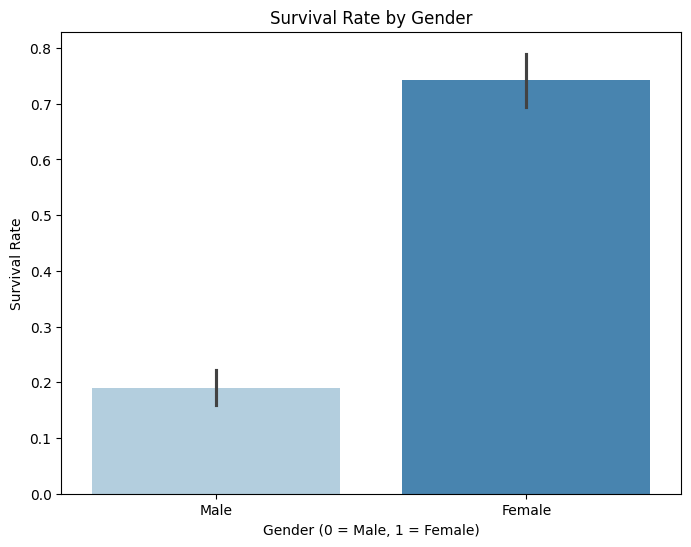

<ipython-input-90-debdf54c08b1>:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Pclass', y='Survived', data=train, palette='Blues')


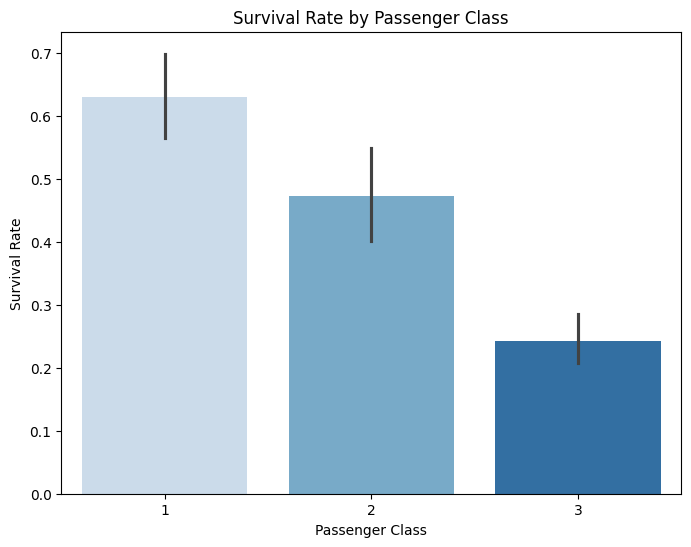

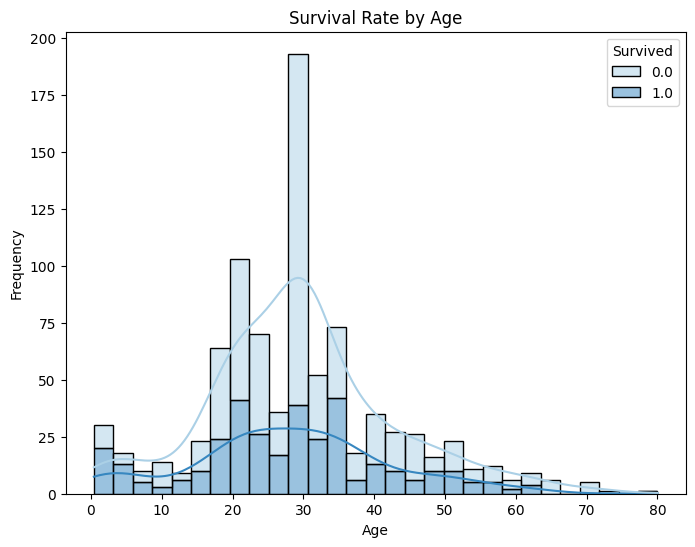

In [90]:
import matplotlib.pyplot as plt
import seaborn as sns


plt.figure(figsize=(8, 6))
sns.barplot(x='Sex', y='Survived', data=train, palette='Blues')
plt.title('Survival Rate by Gender')
plt.xlabel('Gender (0 = Male, 1 = Female)')
plt.ylabel('Survival Rate')
plt.xticks(ticks=[0, 1], labels=['Male', 'Female'])
plt.show()

# Plotting survival rate by passenger class (Pclass)
plt.figure(figsize=(8, 6))
sns.barplot(x='Pclass', y='Survived', data=train, palette='Blues')
plt.title('Survival Rate by Passenger Class')
plt.xlabel('Passenger Class')
plt.ylabel('Survival Rate')
plt.show()

# Plotting survival rate by age
plt.figure(figsize=(8, 6))
sns.histplot(data=train, x='Age', hue='Survived', multiple="stack", kde=True, palette='Blues')
plt.title('Survival Rate by Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()


